In [1]:
import torch.nn as nn
import torch
from torch.autograd import Variable
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.utils.data as Data
import numpy as np
import pandas as pd


In [2]:
def Normalize_Features(data,l,r):
    Min = np.amin(data,0)
    Max = np.amax(data,0)
    Min = Min.astype(float)
    Max = Max.astype(float)
    data = data.astype(float)
    data[:,l:r] = (data[:,l:r] - Min[l:r])/(Max[l:r] - Min[l:r]) 
    return data

In [3]:
def AUROC(Y,Y_Hat):
    Y_True = Y.numpy()
    Y_Pred = Y_Hat.numpy()
    return roc_auc_score(Y_True, Y_Pred)

In [4]:
class Get_Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(D - 1, H1)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(H1, H2)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(H2, OP)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y

In [5]:
import torch.utils.data
class Sampler(torch.utils.data.Sampler):
    def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

class StratifiedSampler(Sampler):
    def __init__(self, class_vector, batch_size):
        self.n_splits = int(class_vector.size(0) / batch_size)
        self.class_vector = class_vector

    def gen_sample_array(self):
        try:
            from sklearn.model_selection import StratifiedShuffleSplit
        except:
            print('Need scikit-learn for this functionality')
        import numpy as np
        
        s = StratifiedShuffleSplit(n_splits=self.n_splits, test_size=0.5)
        X = torch.randn(self.class_vector.size(0),2).numpy()
        y = self.class_vector.numpy()
        s.get_n_splits(X, y)

        train_index, test_index = next(s.split(X, y))
        return np.hstack([train_index, test_index])

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return len(self.class_vector)

In [6]:
def Solve(X,Y):
    Net = Get_Net()
    Loss_Func = nn.BCELoss()
    Optimizer = torch.optim.Adam(Net.parameters(), lr = LR, betas = (0.9, 0.999))
    Torch_Dataset = Data.TensorDataset(X,Y)
    Loader = Data.DataLoader(
        dataset = Torch_Dataset,
        batch_size = BATCH_SIZE,
        shuffle = True,
        num_workers = 2,
    )
    for Epoch in range(EPOCH):
        cnt = 0
        s = 0
        for step, (Batch_X,Batch_Y) in enumerate(Loader):
            Optimizer.zero_grad()
            B_X = Variable(Batch_X)
            B_Y = Variable(Batch_Y)
            Prediction = Net(B_X)
            Loss = Loss_Func(Prediction.squeeze(),B_Y)
            s = s + Loss.data.item()
            cnt = cnt + 1
            Loss.backward()
            Optimizer.step()
        print(s / cnt)
    return Net
    
    

['VAR45', 'VAR47', 'VAR69', 'VAR74', 'VAR75', 'VAR77', 'VAR95']
0.31615642563863233
0.29545459882779557
0.2903693089160052
0.286992710666223
0.2833857275681062
0.2799394416267222
0.28296137723055753
0.2837755430557511
0.28064044708555397
0.27918728833848777
0.28300635600631885
0.28033834584734657
0.2774286889488047
0.2806062509525906
0.27480534247376703
0.27806850471279837
0.274266394756057
0.27621367092836985
0.27354957485740833
0.270270575447516
0.2711236247555776
0.27285304218530654
0.2736823364279487
0.2731769594685598
0.2676685192368247
0.2689208835634318
0.27447226789864626
0.2717470041188327
0.26905783967538316
0.2702826956591823
0.2676349567012353
0.2666763885454698
0.26843913528052243
0.2714193826913834
0.2675607028874484
0.26456189705566924
0.2643712818622589
0.2641228277574886
0.265486239221963
0.2684291906654835
0.26539692214944144
0.2640533239191229
0.2646853731437163
0.2617126648263498
0.2635447704521092
0.26271050390872086
0.26613740395415914
0.26274611137130044
0.267743

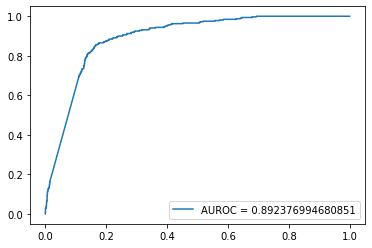

['VAR32', 'VAR65', 'VAR108', 'VAR145', 'VAR158', 'VAR185', 'VAR188', 'VAR195', 'VAR202', 'VAR207']
0.2074897125032213
0.17975012798276213
0.17419326938688756
0.17520082054038844
0.1731052538504203
0.17621178755743636
0.17136984061863686
0.17339609699737696
0.18271103899512026
0.17212834853265022
0.17137006516982284
0.17091513795985117
0.1708293823235565
0.17063437587685054
0.16837339028716086
0.17396622733523448
0.17178934262030654
0.17046943749818538
0.16660348590049479
0.17152739718556403
0.16591554838336176
0.16654890184187227
0.1636722490274244
0.16716508822308646
0.1624866132107046
0.16527993962582616
0.16601316584481132
0.16393580368823477
0.1643937754051553
0.16248751358439525
0.16558977452417215
0.1646125644693772
0.16303630024194718
0.1654820084820191
0.1737087245616648
0.16149436723854807
0.16223376818415192
0.16020079443852106
0.16280292086303233
0.16192688748240472
0.1604847200959921
0.1583322696139415
0.1589777871966362
0.15729157492518425
0.16239957965910434
0.16147946426

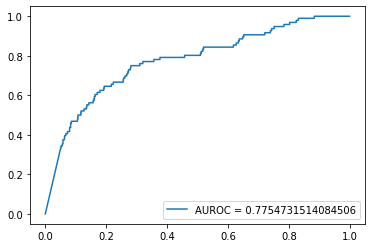

['VAR36', 'VAR113', 'VAR122', 'VAR144', 'VAR146', 'VAR153', 'VAR190', 'VAR196', 'VAR198']
0.3625729962587357
0.3316594080328941
0.3291209683418274
0.321133424282074
0.31914900332689283
0.3072567413151264
0.3145183693766594
0.3095919939279556
0.3050764649808407
0.3096892229914665
0.30782643020153044
0.30711365103721616
0.30119410049915313
0.30101211661100385
0.30329967564344407
0.2952031412124634
0.2954826074540615
0.29636803966760633
0.29976973110437394
0.2962964944243431
0.2936100791692734
0.293727104395628
0.2851636296510696
0.28559398341178893
0.28077633994817736
0.28762235993146895
0.28259972190856936
0.28115385556221006
0.28819707161188124
0.2897817249298096
0.28555545264482496
0.2755308305621147
0.28455405932664873
0.2763679957985878
0.27677853202819824
0.27833910232782366
0.29095286786556246
0.2840537080168724
0.28222313678264616
0.27540855705738065
0.29307183808088305
0.2727228603363037
0.27483867526054384
0.2739743258357048
0.2665381276011467
0.2755481425523758
0.2748525153994

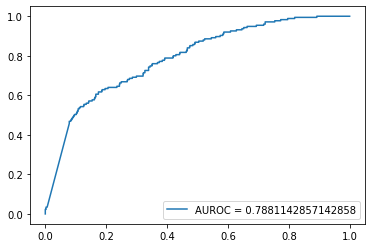

AUROC1 = 0.892377
AUROC2 = 0.775473
AUROC3 = 0.788114


In [7]:
def main():
    
    
    global D
    global H1
    global H2
    global H3
    global OP
    global LR
    global BATCH_SIZE
    global EPOCH
    BATCH_SIZE = 32
    EPOCH = 100
    H1 = 100
    H2 = 100
    OP = 1
    LR = 0.01
    
    AUROCList = []
    
    for idx in range(1,4):
        Data_Set = pd.read_csv("data/target%d_training_data.csv"%(idx))
        Test_Set = pd.read_csv("data/target%d_test_data.csv"%(idx))
        LabelSet = pd.read_csv("data/target%d_training_label.csv"%(idx))
    
        # clean data
        Cols = Data_Set.columns
        Del = []
        L = Data_Set.shape[0]
        for El in Cols:
            if type(Data_Set.iloc[4][El]) == str or type(Data_Set.iloc[20][El]) == str:
                Del.append(El)
                continue    
            count  = Data_Set[El].isna().sum()
            if (count / L) > 0.6:
                Del.append(El)
        print(Del)

        Data_Set = Data_Set.drop(Del,axis = 1)
        Test_Set = Test_Set.drop(Del,axis = 1)
    
        Data_Set = Data_Set.fillna(Data_Set.mean())
        Test_Set = Test_Set.fillna(Test_Set.mean())
    
        # prepare data

        Data_NP = Data_Set.values
        Test_NP = Test_Set.values
        LabelNP = LabelSet.values

        Len = len(LabelNP)
        N = int(Len * 8 / 10)
        D = Data_Set.shape[1]
        
#         Index = np.random.permutation(Len)
#         Data_NP = Data_NP[Index,:]
#         LabelNP = LabelNP[Index,:]
        
        # normalize and add one hot vectors here
        Data_NP = Normalize_Features(Data_NP,1,D)
        Test_NP = Normalize_Features(Test_NP,1,D)

        X = torch.from_numpy(Data_NP[0:N,1:D]).float()
        Y = torch.from_numpy(LabelNP[0:N,1]).float()
        Valid_X = torch.from_numpy(Data_NP[N:Len,1:D]).float()
        Valid_Y = torch.from_numpy(LabelNP[N:Len,1]).float()
        Test_X = torch.from_numpy(Test_NP[:,1:]).float()
    
        Net = Solve(X,Y)
    
        Valid_P = Net(Valid_X).squeeze()
        Auroc = AUROC(Valid_Y,Valid_P.detach())
        AUROCList.append(Auroc)
        print("AUROC%d = %f"%(idx,Auroc))
        
        FP, TP, _ = metrics.roc_curve(Valid_Y,Valid_P.detach())
        plt.plot(FP,TP,label = "AUROC = " + str(Auroc))
        plt.legend(loc = 4)
        plt.show()
        
        Test_Y = Net(Test_X).squeeze()
        Test_DataFrame = pd.DataFrame(Test_Y.data.numpy())
        Test_DataFrame.to_csv("data/target"+ str(idx)+"_test_predictions.csv")
    
    print("AUROC1 = %f"%(AUROCList[0]))
    print("AUROC2 = %f"%(AUROCList[1]))
    print("AUROC3 = %f"%(AUROCList[2]))
    
if __name__ == '__main__':
    main()
